# Exploratory Data Analysis of Dating Applications

## Demographics For OkCupid Dating Application

  Resources used from URL: <https://www.kaggle.com/datasets/andrewmvd/okcupid-profiles>  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
import json
from matplotlib import pyplot as plt
from scipy.stats import sem
from scipy.stats import linregress


# Import API key
from api_keys import alpha_key

# File to Load
profiles_path = "Resources/okcupid_profiles_cut.csv"

# Read the modified Comic Books csv and store into Pandas DataFrame
profiles_df = pd.read_csv(profiles_path, encoding="UTF-8")
profiles_df.head()




,age,sex,orientation,drinks,drugs,education,income,job,location,sign
0,22,m,straight,socially,never,working on college/university,-1,transportation,"south san francisco, california",gemini
1,35,m,straight,often,sometimes,working on space camp,80000,hospitality / travel,"oakland, california",cancer
2,38,m,straight,socially,NaN,graduated from masters program,-1,NaN,"san francisco, california",pisces but it doesn&rsquo;t matter
3,23,m,straight,socially,NaN,working on college/university,20000,student,"berkeley, california",pisces
4,29,m,straight,socially,never,graduated from college/university,-1,artistic / musical / writer,"san francisco, california",aquarius


## Format and clean data for columns used

In [2]:
# Formatting and cleaning Data
columns=["age",
      "sex", "orientation","drinks",
      "drugs","education",
      "income","job","location","sign"
     ]
profiles_df[columns]=profiles_df[columns].fillna("No info")
profiles_df["income"]=profiles_df["income"].replace(-1, 0)

In [3]:
# Extract only columns that will be needed from main df and create new df

reduced_profiles_df = profiles_df.loc[:, ["age", "sex", "orientation",
                                    "drinks", "drugs", "education", "income", "job", "location", "sign"]]
reduced_profiles_df.head()


,age,sex,orientation,drinks,drugs,education,income,job,location,sign
0,22,m,straight,socially,never,working on college/university,0,transportation,"south san francisco, california",gemini
1,35,m,straight,often,sometimes,working on space camp,80000,hospitality / travel,"oakland, california",cancer
2,38,m,straight,socially,No info,graduated from masters program,0,No info,"san francisco, california",pisces but it doesn&rsquo;t matter
3,23,m,straight,socially,No info,working on college/university,20000,student,"berkeley, california",pisces
4,29,m,straight,socially,never,graduated from college/university,0,artistic / musical / writer,"san francisco, california",aquarius


In [4]:
# Split 'location' into City and State into diffent columns

reduced_profiles_df[['City', 'State']]= reduced_profiles_df['location'].str.split(',', n=1, expand=True)
reduced_profiles_df.head()


,age,sex,orientation,drinks,drugs,education,income,job,location,sign,City,State
0,22,m,straight,socially,never,working on college/university,0,transportation,"south san francisco, california",gemini,south san francisco,california
1,35,m,straight,often,sometimes,working on space camp,80000,hospitality / travel,"oakland, california",cancer,oakland,california
2,38,m,straight,socially,No info,graduated from masters program,0,No info,"san francisco, california",pisces but it doesn&rsquo;t matter,san francisco,california
3,23,m,straight,socially,No info,working on college/university,20000,student,"berkeley, california",pisces,berkeley,california
4,29,m,straight,socially,never,graduated from college/university,0,artistic / musical / writer,"san francisco, california",aquarius,san francisco,california


In [5]:
# Combining similar values under 'sign' column

reduced_profiles_df = reduced_profiles_df.replace({
    "aquarius but it doesn&rsquo;t matter": "aquarius", "aquarius and it&rsquo;s fun to think about": "aquarius", "aquarius and it matters a lot": "aquarius",
    "aries and it matters a lot": "aries", "aries and it&rsquo;s fun to think about": "aries", "aries but it doesn&rsquo;t matter": "aries",
    "cancer but it doesn&rsquo;t matter": "cancer", "cancer and it matters a lot": "cancer", "cancer and it&rsquo;s fun to think about": "cancer",
    "capricorn and it matters a lot": "capricorn", "capricorn and it&rsquo;s fun to think about": "capricorn", "capricorn but it doesn&rsquo;t matter": "capricorn",
    "gemini and it matters a lot": "gemini", "gemini and it&rsquo;s fun to think about": 'gemini', "gemini but it doesn&rsquo;t matter": 'gemini',
    "leo and it matters a lot": "leo", "leo and it&rsquo;s fun to think about": "leo", "leo but it doesn&rsquo;t matter": "leo",
    "libra and it matters a lot": "libra", "libra and it&rsquo;s fun to think about": "libra", "libra but it doesn&rsquo;t matter": "libra",
    "pisces and it matters a lot": "pisces", "pisces and it&rsquo;s fun to think about": "pisces", "pisces but it doesn&rsquo;t matter": "pisces",
    "sagittarius and it&rsquo;s fun to think about": "sagittarius", "sagittarius and it matters a lot": "sagittarius", "sagittarius but it doesn&rsquo;t matter": "sagittarius",
    "scorpio and it matters a lot": "scorpio", "scorpio and it&rsquo;s fun to think about": "scorpio", "scorpio but it doesn&rsquo;t matter": "scorpio",
    "taurus but it doesn&rsquo;t matter": "taurus", "taurus and it&rsquo;s fun to think about": "taurus", "taurus and it matters a lot": "taurus",
    "virgo but it doesn&rsquo;t matter": "virgo", "virgo and it&rsquo;s fun to think about": "virgo", "virgo and it matters a lot": "virgo"

})
reduced_profiles_df.head()

,age,sex,orientation,drinks,drugs,education,income,job,location,sign,City,State
0,22,m,straight,socially,never,working on college/university,0,transportation,"south san francisco, california",gemini,south san francisco,california
1,35,m,straight,often,sometimes,working on space camp,80000,hospitality / travel,"oakland, california",cancer,oakland,california
2,38,m,straight,socially,No info,graduated from masters program,0,No info,"san francisco, california",pisces,san francisco,california
3,23,m,straight,socially,No info,working on college/university,20000,student,"berkeley, california",pisces,berkeley,california
4,29,m,straight,socially,never,graduated from college/university,0,artistic / musical / writer,"san francisco, california",aquarius,san francisco,california


In [6]:
reduced_profiles_df.count()

age            59946
sex            59946
orientation    59946
drinks         59946
drugs          59946
education      59946
income         59946
job            59946
location       59946
sign           59946
City           59946
State          59946
dtype: int64

In [7]:
# Create the bins in which Data will be held for age groups

bins = [0, 19.9, 29.9, 39.9, 49.9, 59.9, 69.9, 79.9, 89.9, 99.9, 110]

# Create the years for the ten bins

group_years = ["Teens", "20's", "30's", "40's", "50's", 
                "60's", "70's", "80's", "90's", "100's"]

In [8]:
#Add new column for 'Age Group Summary'

reduced_profiles_df["Age Group Summary"] = pd.cut(reduced_profiles_df["age"], bins, labels=group_years, include_lowest=True)
reduced_profiles_df.head()

,age,sex,orientation,drinks,drugs,education,income,job,location,sign,City,State,Age Group Summary
0,22,m,straight,socially,never,working on college/university,0,transportation,"south san francisco, california",gemini,south san francisco,california,20's
1,35,m,straight,often,sometimes,working on space camp,80000,hospitality / travel,"oakland, california",cancer,oakland,california,30's
2,38,m,straight,socially,No info,graduated from masters program,0,No info,"san francisco, california",pisces,san francisco,california,30's
3,23,m,straight,socially,No info,working on college/university,20000,student,"berkeley, california",pisces,berkeley,california,20's
4,29,m,straight,socially,never,graduated from college/university,0,artistic / musical / writer,"san francisco, california",aquarius,san francisco,california,20's


## Create a Pie Graph to show all male and female users by percentage


In [9]:
gender_count = reduced_profiles_df["sex"].value_counts()
gender_count

m    35829
f    24117
Name: sex, dtype: int64

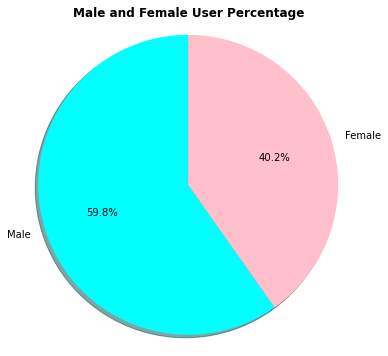

In [10]:
plt.figure(figsize=(6,6))

gender = ["Male", "Female"]
users = [35829, 24117]
colors = ["aqua", "pink"]
explode = (0, 0)
plt.title("Male and Female User Percentage", fontweight='bold')
plt.pie(users, explode=explode, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.savefig("Images/gender_distribution.png")
plt.show()

## Create a Bar Graph to display all users by Age Groups

In [11]:
age_summary= reduced_profiles_df["Age Group Summary"].value_counts()
age_summary

20's     27821
30's     19846
40's      7338
50's      2860
60's      1159
Teens      920
100's        2
90's         0
80's         0
70's         0
Name: Age Group Summary, dtype: int64

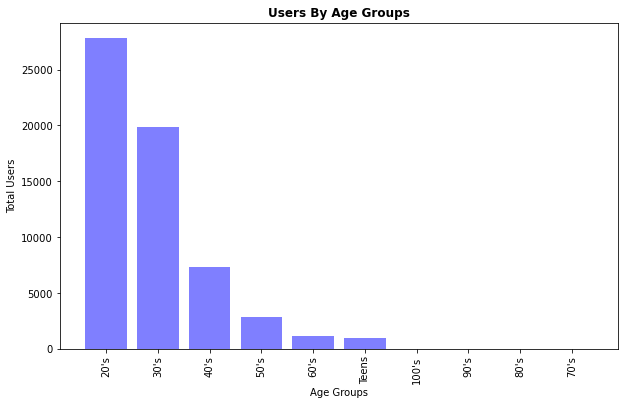

<Figure size 432x288 with 0 Axes>

In [12]:
plt.figure(figsize=(10,6))
plt.bar(age_summary.index.values,age_summary.values, color='blue', alpha=0.5, align="center")
#x_axis = np.arange(len(drug_and_timepoints))
#plt.xticks(x_axis, tick_locations, groupby_drug_and_timepoints["Drug Regimen"], rotation="vertical")

plt.title("Users By Age Groups", fontweight='bold')
plt.xlabel("Age Groups")
plt.ylabel("Total Users")
plt.xticks(rotation=90)
plt.savefig("Images/users_by_age_groups.png")
plt.show()

plt.tight_layout()



## Create a Pie Graph to display all users by orientation

In [13]:
by_orientation= reduced_profiles_df["orientation"].value_counts()
by_orientation

straight    51606
gay          5573
bisexual     2767
Name: orientation, dtype: int64

<IPython.core.display.Javascript object>


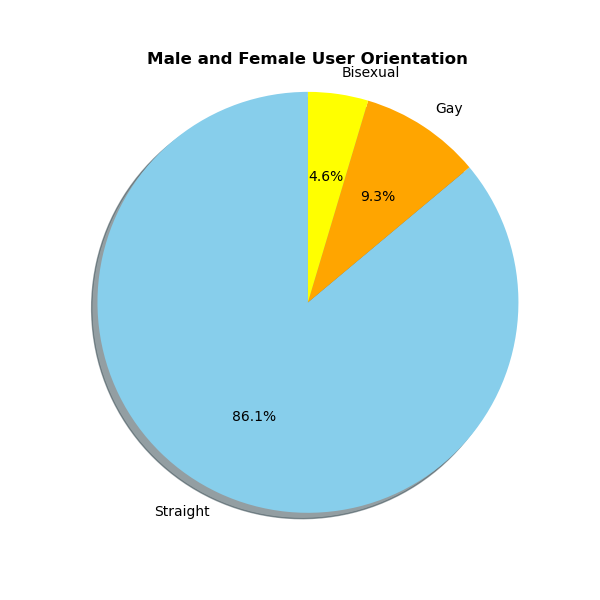

In [68]:
plt.figure(figsize=(6,6))

orientation = ["Straight", "Gay", "Bisexual"]
orient_users = [51606, 5573, 2767]
colors = ["skyblue", "orange", "yellow"]
explode = (0, 0, 0)
plt.title("Male and Female User Orientation", fontweight='bold')
plt.pie(orient_users, explode=explode, labels=orientation, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.savefig("Images/total_user_orientation.png")
plt.show()

## Create a Bar Graph to display users zodiac sign

In [15]:
new_zodiac_sign = reduced_profiles_df.loc[reduced_profiles_df['sign'] != 'No info']
zodiac_sign = new_zodiac_sign["sign"].value_counts()
zodiac_sign



leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: sign, dtype: int64

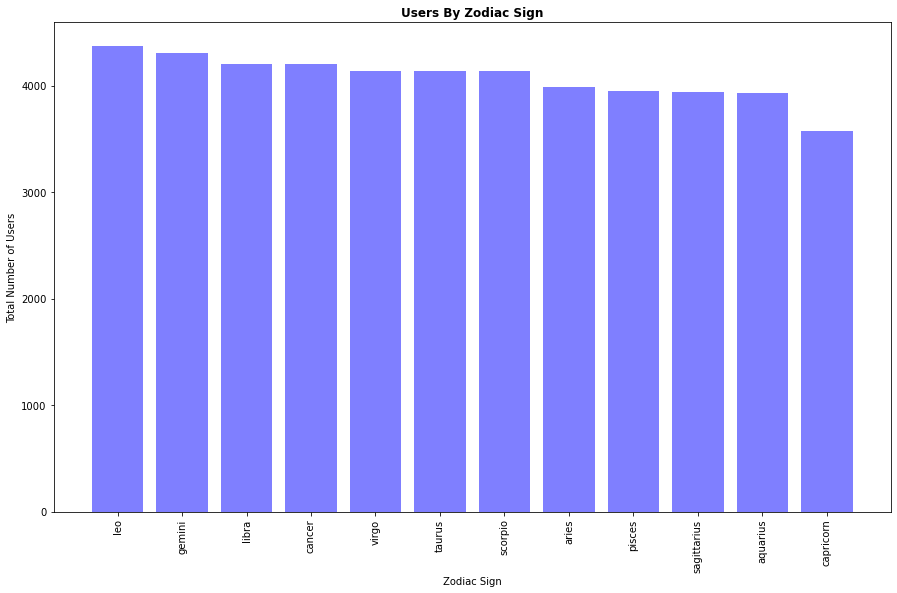

<Figure size 432x288 with 0 Axes>

In [16]:
plt.figure(figsize=(15,9))
plt.bar(zodiac_sign.index.values,zodiac_sign.values, color='blue', alpha=0.5, align="center")
#x_axis = np.arange(len(drug_and_timepoints))
#plt.xticks(x_axis, tick_locations, groupby_drug_and_timepoints["Drug Regimen"], rotation="vertical")

plt.title("Users By Zodiac Sign", fontweight='bold')
plt.xlabel("Zodiac Sign")
plt.ylabel("Total Number of Users")
plt.xticks(rotation=90)
plt.savefig("Images/users_by_zodiac_signs.png")
plt.show()

plt.tight_layout()


In [17]:
state = reduced_profiles_df["location"].value_counts()
state

san francisco, california         31064
oakland, california                7214
berkeley, california               4212
san mateo, california              1331
palo alto, california              1064
                                  ...  
peoria, illinois                      1
grand rapids, michigan                1
guadalajara, mexico                   1
south wellfleet, massachusetts        1
las vegas, nevada                     1
Name: location, Length: 199, dtype: int64

In [18]:
columns = ["age", "sex", "orientation", "drinks","drugs", "education", "income", "job", "location", "sign", "City", "State", "Age Group Summary"]

state_df = reduced_profiles_df.loc[reduced_profiles_df["State"]==" california", columns]
state_df


,age,sex,orientation,drinks,drugs,education,income,job,location,sign,City,State,Age Group Summary
0,22,m,straight,socially,never,working on college/university,0,transportation,"south san francisco, california",gemini,south san francisco,california,20's
1,35,m,straight,often,sometimes,working on space camp,80000,hospitality / travel,"oakland, california",cancer,oakland,california,30's
2,38,m,straight,socially,No info,graduated from masters program,0,No info,"san francisco, california",pisces,san francisco,california,30's
3,23,m,straight,socially,No info,working on college/university,20000,student,"berkeley, california",pisces,berkeley,california,20's
4,29,m,straight,socially,never,graduated from college/university,0,artistic / musical / writer,"san francisco, california",aquarius,san francisco,california,20's
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,59,f,straight,socially,never,graduated from college/university,0,sales / marketing / biz dev,"oakland, california",cancer,oakland,california,50's
59942,24,m,straight,often,sometimes,working on college/university,0,entertainment / media,"san francisco, california",leo,san francisco,california,20's
59943,42,m,straight,not at all,never,graduated from masters program,100000,construction / craftsmanship,"south san francisco, california",sagittarius,south san francisco,california,40's
59944,27,m,straight,socially,often,working on college/university,0,medicine / health,"san francisco, california",leo,san francisco,california,20's


In [19]:
city = reduced_profiles_df["City"].value_counts()
city

san francisco     31064
oakland            7214
berkeley           4212
san mateo          1331
palo alto          1064
                  ...  
canyon country        1
sunnyvale             1
vacaville             1
studio city           1
astoria               1
Name: City, Length: 198, dtype: int64

## Show information for only males with reported income greater than zero

In [20]:
# Out of 35,829 total male users, only 8,391 responded to having an income level

#Separate all information for only 'm' (male) under "sex" column

males_df = reduced_profiles_df.loc[(reduced_profiles_df["sex"]== "m") & (reduced_profiles_df["income"]>0)]
males_df.head()

,age,sex,orientation,drinks,drugs,education,income,job,location,sign,City,State,Age Group Summary
1,35,m,straight,often,sometimes,working on space camp,80000,hospitality / travel,"oakland, california",cancer,oakland,california,30's
3,23,m,straight,socially,No info,working on college/university,20000,student,"berkeley, california",pisces,berkeley,california,20's
11,28,m,straight,socially,never,graduated from college/university,40000,banking / financial / real estate,"daly city, california",leo,daly city,california,20's
43,40,m,straight,socially,No info,graduated from college/university,60000,construction / craftsmanship,"san francisco, california",gemini,san francisco,california,40's
66,22,m,straight,rarely,never,working on college/university,20000,education / academia,"san jose, california",virgo,san jose,california,20's


In [21]:
len(males_df)


8391

In [22]:
male_income = males_df["income"].value_counts()
male_income

20000      1921
100000     1365
80000       850
30000       728
40000       666
50000       664
150000      556
70000       541
60000       515
1000000     396
250000      144
500000       45
Name: income, dtype: int64

In [23]:
male_income_list = ["$20K", "$30K", "$40K", "$50K", "$60K", "$70K", "$80K", 
          "$90K", "$100K", "$150K", "$250K", "$500K", "1M"]
male_reported_income = [1921, 728, 666, 664, 515, 541, 850, 0, 1365, 556, 144, 45, 396]

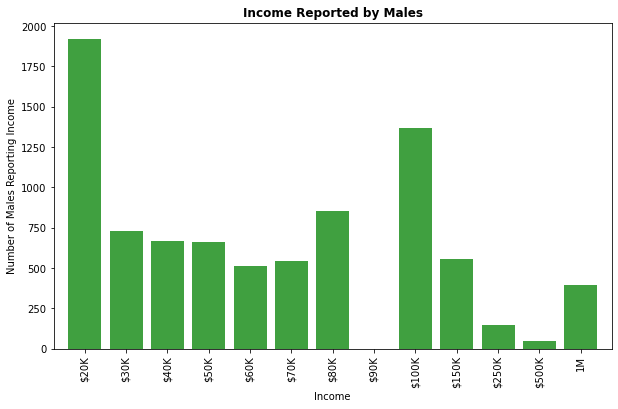

In [24]:
plt.figure(figsize=(10,6))
x_axis = np.arange(0, len(male_income_list))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Income Reported by Males", fontweight='bold')
plt.xlabel("Income")
plt.ylabel("Number of Males Reporting Income")
plt.xticks(rotation=90)

plt.xlim(-0.75, len(male_income_list)-.25)
plt.ylim(0, max(male_reported_income) + 100)

plt.bar(x_axis, male_reported_income, facecolor="green", alpha=0.75, align="center")
plt.xticks(tick_locations, male_income_list)
plt.savefig("Images/males_reporting_income.png")
plt.show()

## Show information for only females with reported income greater than zero

In [25]:
# Out of 24,117 total female users - only 3,113 responded to having and income level

#Separate all information for only 'f' (female) under "sex" column and "income" greater than zero

females_df = reduced_profiles_df.loc[(reduced_profiles_df["sex"]== "f") & (reduced_profiles_df["income"]>0)]
females_df.head()

,age,sex,orientation,drinks,drugs,education,income,job,location,sign,City,State,Age Group Summary
13,30,f,straight,socially,never,graduated from high school,30000,sales / marketing / biz dev,"san francisco, california",No info,san francisco,california,30's
14,29,f,straight,socially,never,working on college/university,50000,other,"san leandro, california",taurus,san leandro,california,20's
48,31,f,bisexual,socially,sometimes,dropped out of space camp,1000000,artistic / musical / writer,"san francisco, california",No info,san francisco,california,30's
73,31,f,straight,socially,never,graduated from law school,50000,law / legal services,"oakland, california",libra,oakland,california,30's
92,29,f,straight,No info,sometimes,graduated from two-year college,50000,medicine / health,"el granada, california",capricorn,el granada,california,20's


In [26]:
len(females_df)

3113

In [27]:
females_income = females_df["income"].value_counts()
females_income

20000      1031
40000       339
30000       320
50000       311
80000       261
100000      256
60000       221
70000       166
1000000     125
150000       75
250000        5
500000        3
Name: income, dtype: int64

In [28]:
female_income_list = ["$20K", "$30K", "$40K", "$50K", "$60K", "$70K", "$80K", 
          "$90K", "$100K", "$150K", "$250K", "$500K", "1M"]
female_reported_income = [1031, 320, 339, 311, 221, 166, 261, 0, 256, 75, 5, 3, 125]

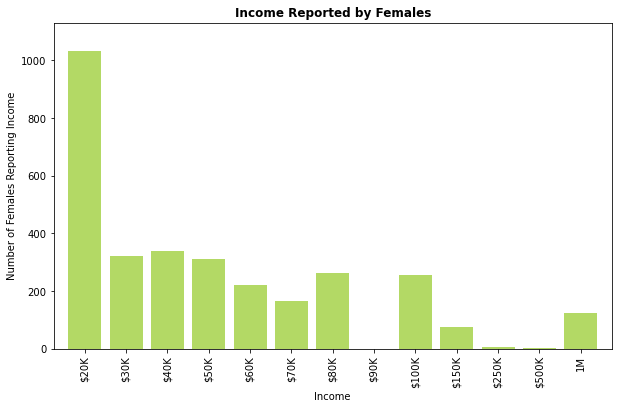

In [29]:
plt.figure(figsize=(10,6))
x_axis = np.arange(0, len(female_income_list))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Income Reported by Females", fontweight='bold')
plt.xlabel("Income")
plt.ylabel("Number of Females Reporting Income")
plt.xticks(rotation=90)

plt.xlim(-0.75, len(female_income_list)-.25)
plt.ylim(0, max(female_reported_income) + 100)

plt.bar(x_axis, female_reported_income, facecolor="yellowgreen", alpha=0.75, align="center")
plt.xticks(tick_locations, female_income_list)
plt.savefig("Images/females_reporting_income.png")
plt.show()

## Compare how many men and females reported income greater than zero

In [30]:
male_female_income_df = pd.DataFrame({"Male": male_income,
                                     "Female":females_income })
male_female_income_df

,Male,Female
20000,1921,1031
30000,728,320
40000,666,339
50000,664,311
60000,515,221
70000,541,166
80000,850,261
100000,1365,256
150000,556,75
250000,144,5


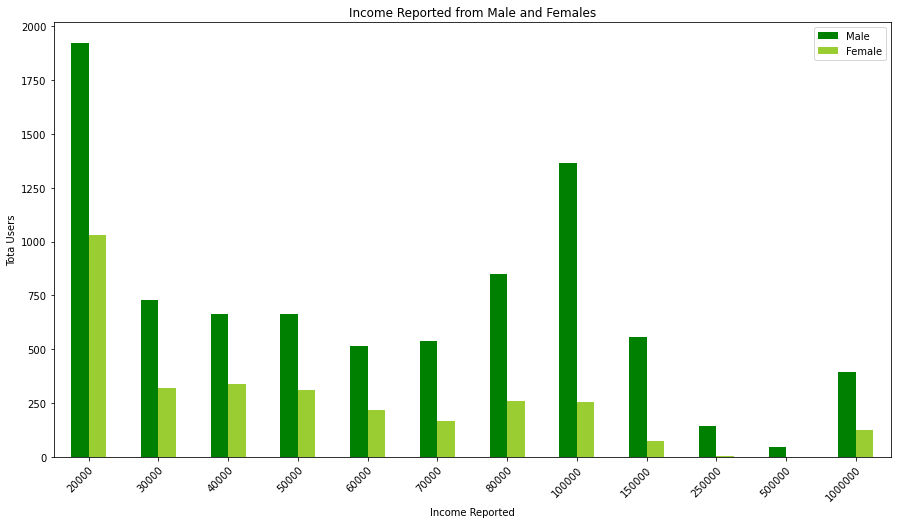

In [31]:
# Configure plot, figsize, title, and axis labels
figure1 = male_female_income_df.plot(kind="bar", color=["green", "yellowgreen"], figsize=(15,8),
                                   title="Income Reported from Male and Females")
figure1.set_xlabel("Income Reported")
figure1.set_ylabel("Tota Users")

# Configure x-tick rotation
xticklabels = male_female_income_df.index
figure1.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

plt.savefig("Images/males_and_females_income.png")


# Show plot
plt.show()

## User Rating Reviews

In [32]:
# Data files Paths
okcupid_path = "Resources/okcupid_google_play_reviews_cuts.csv"
tinder_path  = "Resources/tinder_google_play_reviews_cuts.csv"
hinge_path  = "Resources/hinge_google_play_reviews_cuts.csv"

# Read the Data
okcupid = pd.read_csv(okcupid_path)
tinder = pd.read_csv(tinder_path)
hinge = pd.read_csv(hinge_path)


In [33]:
# print head of okcupid table
okcupid.head()


,userName,score,thumbsUpCount,at
0,Tina Richards,4,0,5/7/22 5:36
1,Volkan,1,0,5/7/22 5:24
2,Jillian R,1,0,5/7/22 2:32
3,Robert A Creo,5,0,5/6/22 23:34
4,mueller sven,3,0,5/6/22 20:34


In [34]:
# show types of data
okcupid.dtypes

userName         object
score             int64
thumbsUpCount     int64
at               object
dtype: object

In [35]:
# print head of tinder table
tinder.head()

,userName,score,thumbsUpCount,at
0,Yatin Raval,5,0,5/7/22 4:58
1,T 1000,1,0,5/7/22 4:49
2,Richard Mistretta,1,0,5/7/22 4:45
3,Shubham Saxena,1,0,5/7/22 4:38
4,swaggy jatt,4,1,5/7/22 4:37


In [36]:
# show types of data
tinder.dtypes

userName         object
score             int64
thumbsUpCount     int64
at               object
dtype: object

In [37]:
# print head of inge table
hinge.head()

,userName,score,thumbsUpCount,at
0,Nikhil Raman,5,0,5/8/22 6:16
1,Khoa's World,1,0,5/8/22 5:37
2,Gabriel Drane,1,0,5/8/22 3:57
3,Christopher Churn,1,0,5/8/22 3:50
4,Rojomau5,3,0,5/8/22 3:11


In [38]:
# show types of data

hinge.dtypes

userName         object
score             int64
thumbsUpCount     int64
at               object
dtype: object

In [39]:
# obtain avrage ratingings
average_okcupid = okcupid['score'].mean()
average_tinder = tinder['score'].mean()
average_hinge = hinge['score'].mean()
print(average_okcupid)
print(average_tinder)
print(average_hinge)


3.404704119616366
2.9983962195538134
3.142329223226373


In [40]:
# okcupid individual ratings

# remove 0 rating
okcupid_remove = okcupid[okcupid['score']>0]

# count rating values
okcupid_rating_count = okcupid_remove['score'].value_counts().sort_index()

# table setup
okcupid_rating = pd.DataFrame(
    {"Rating":okcupid_rating_count}
)
# print table
okcupid_rating.sort_index()



,Rating
1,33597
2,7947
3,10912
4,24328
5,51350


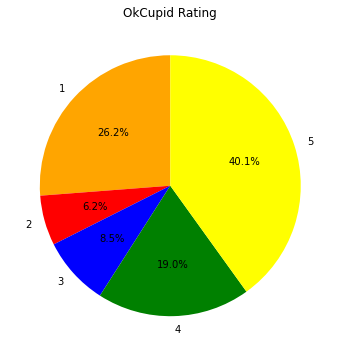

In [41]:
# OkCupid pie chart
plt.figure(figsize=(6,6))
colors1 = ["orange","red","blue","green","yellow"]
# set-up pie chart
plt.pie(okcupid_rating_count, labels=okcupid_rating_count.index.values, colors = colors1,autopct="%1.1f%%", startangle=90)
plt.title('OkCupid Rating')

# Save File
plt.savefig("Images/OkCupidPie.png")

# print pie chart
plt.show()

In [42]:
# Tinder individual ratings

# remove 0 rating
tinder_remove = tinder[tinder['score']>0]

# count rating values
tinder_rating_count = tinder_remove['score'].value_counts().sort_index()

# table setup
tinder_rating = pd.DataFrame(
    {"Rating":tinder_rating_count}
)
# print table
tinder_rating.sort_index()

,Rating
1,201492
2,38439
3,43188
4,65660
5,187453


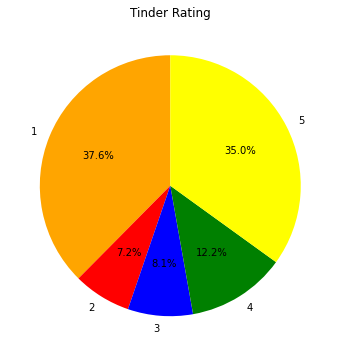

In [43]:
# Tinder pie chart
plt.figure(figsize=(6,6))
colors2 = ["orange","red","blue","green","yellow"]

# set-up pie chart
plt.pie(tinder_rating_count, labels=tinder_rating_count.index.values, colors = colors2,autopct="%1.1f%%", startangle=90)
plt.title('Tinder Rating')

#Save file
plt.savefig("Images/TinderPie.png")

# print pie chart
plt.show()

In [44]:
# hinge individual ratings

# count rating values
hinge_rating_count = hinge['score'].value_counts().sort_index()

# table setup
hinge_rating = pd.DataFrame(
    {"Rating":hinge_rating_count}
)
# print table
hinge_rating.sort_index()

,Rating
1,16967
2,4711
3,5429
4,8685
5,18870


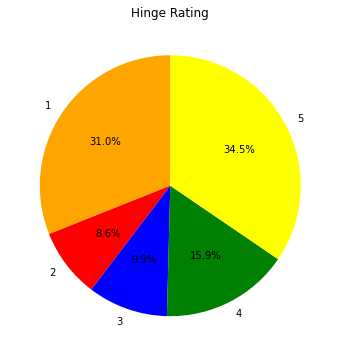

In [45]:
# OkCupid pie chart
plt.figure(figsize=(6,6))

colors3 = ["orange","red","blue","green","yellow"]

# set-up pie chart
plt.pie(hinge_rating_count, labels=hinge_rating_count.index.values, colors = colors3,autopct="%1.1f%%", startangle=90)
plt.title('Hinge Rating')

#Save file
plt.savefig("Images/HingePie.png")

# print pie chart
plt.show()

In [46]:
# rating table set up
rating_compared = pd.DataFrame(
    {"OkCupid":okcupid_rating_count,
    "Tinder":tinder_rating_count,
    "Hinge":hinge_rating_count}
)

# table print
rating_compared.sort_index()


,OkCupid,Tinder,Hinge
1,33597,201492,16967
2,7947,38439,4711
3,10912,43188,5429
4,24328,65660,8685
5,51350,187453,18870


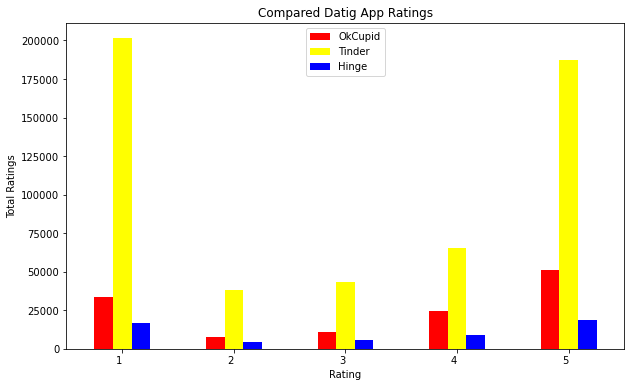

In [47]:
#rating_compared = rating_compared.fillna(0)
# setup bar-graph

# Configure plot, figsize, title, and axis labels
figure1 = rating_compared.plot(kind="bar", color=["red","yellow", "blue"], figsize=(10,6),
                                   title="Compared Datig App Ratings")
figure1.set_xlabel("Rating")
figure1.set_ylabel("Total Ratings")

# Configure x-tick rotation
xticklabels = rating_compared.index
figure1.set_xticklabels(xticklabels,rotation=0, rotation_mode="anchor", ha="right", wrap=True)

#Save file
plt.savefig("Images/ComparedRatings.png")

# Show plot
plt.show()


## How successful are these apps?

In [48]:
matches = pd.read_csv("Resources/Tinder Millennial Match Rate Dataset.csv")
matches.head()

,ID,Segment Type,Segment Description,Answer,Count,Percentage,It became a Relationship
0,292881,Mobile,Mobile respondents,Yes,797,0.207,Yes
1,292883,Mobile,Mobile respondents,No,1969,0.511,No
2,292885,Mobile,Mobile respondents,I don't use Tinder,1090,0.283,Yes
3,292887,Web,Web-based respondents,Yes,0,0.000,No
4,292889,Web,Web-based respondents,No,0,0.000,No


In [49]:
len(matches)

453

In [50]:
bins = [0, .099, .199, .299, .399, .499, .599, .699, .799, .899, 1]

# Create the names for the five bins
group_names = ["10", "20", "30", "40", "50", "60", "70", "80", "90", "100"]
matches["bins"] = pd.cut(matches["Percentage"], bins, labels=group_names, include_lowest=True)
matches

,ID,Segment Type,Segment Description,Answer,Count,Percentage,It became a Relationship,bins
0,292881,Mobile,Mobile respondents,Yes,797,0.207,Yes,30
1,292883,Mobile,Mobile respondents,No,1969,0.511,No,60
2,292885,Mobile,Mobile respondents,I don't use Tinder,1090,0.283,Yes,30
3,292887,Web,Web-based respondents,Yes,0,0.000,No,10
4,292889,Web,Web-based respondents,No,0,0.000,No,10
...,...,...,...,...,...,...,...,...
448,293777,University,Boston College,No,4,0.800,Yes,90
449,293779,University,Boston College,I don't use Tinder,1,0.200,No,30
450,293781,University,Boston University,Yes,2,0.333,Yes,40
451,293783,University,Boston University,No,3,0.500,No,60


In [51]:
matchcount = matches["bins"].value_counts()
matchpercent = matchcount/453*100
matchpercent

10     30.905077
30     15.673289
60     11.920530
100    10.375276
40      9.933775
20      7.064018
50      5.960265
70      4.856512
80      2.207506
90      1.103753
Name: bins, dtype: float64

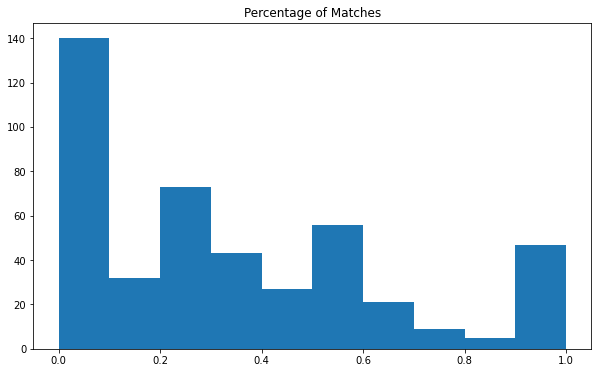

In [52]:
plt.figure(figsize=(10,6))
relationship = matches["Percentage"]
plt.hist(relationship, bins=10)
plt.title("Percentage of Matches")
plt.savefig("Images/Matches.png")

In [53]:
tinder = matches.loc[matches["Answer"] == "Yes"].count()
tinder

ID                          151
Segment Type                151
Segment Description         151
Answer                      151
Count                       151
Percentage                  151
It became a Relationship    151
bins                        151
dtype: int64

In [54]:
success = matches.loc[matches["Answer"] == "Yes"]["It became a Relationship"].value_counts()
success

No     107
Yes     44
Name: It became a Relationship, dtype: int64

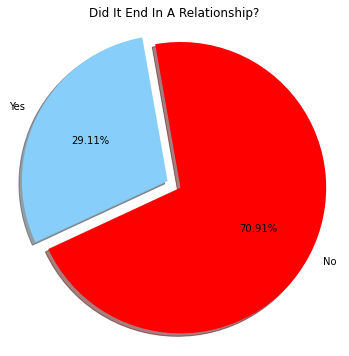

In [55]:
# Labels for the sections of our pie chart
plt.figure(figsize=(6,6))

labels = ["Yes", "No"]

# The values of each section of the pie chart
sizes = [44, 107]

# The colors of each section of the pie chart
colors = ["lightskyblue", "red"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%.1f1%%", shadow=True, startangle=100)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")

plt.title("Did It End In A Relationship?")
# Save an image of our chart and print the final product to the screen
plt.savefig("Images/Success.png")

plt.show()

## Pandemic effect on company growth

In [56]:
stock = 'MTCH'
time = 'TIME_SERIES_MONTHLY'
url = 'https://www.alphavantage.co/query?function='+ time +'&symbol='+ stock +'&apikey=' + alpha_key
response = requests.get(url)
data = response.json()

#print(data)

In [57]:
print(json.dumps(data, indent=4, sort_keys=True))

{
    "Meta Data": {
        "1. Information": "Monthly Prices (open, high, low, close) and Volumes",
        "2. Symbol": "MTCH",
        "3. Last Refreshed": "2022-05-20",
        "4. Time Zone": "US/Eastern"
    },
    "Monthly Time Series": {
        "2015-12-31": {
            "1. open": "14.5300",
            "2. high": "14.9500",
            "3. low": "12.8200",
            "4. close": "13.5500",
            "5. volume": "21683895"
        },
        "2016-01-29": {
            "1. open": "13.4300",
            "2. high": "14.2500",
            "3. low": "11.4500",
            "4. close": "12.5500",
            "5. volume": "20479911"
        },
        "2016-02-29": {
            "1. open": "12.1100",
            "2. high": "12.9500",
            "3. low": "8.4100",
            "4. close": "10.8900",
            "5. volume": "30114788"
        },
        "2016-03-31": {
            "1. open": "11.0600",
            "2. high": "12.3000",
            "3. low": "10.4800",
        

In [58]:
closing = []
response = requests.get(url).json()
closing.append(response["Monthly Time Series"]["2019-03-29"]["4. close"])
closing.append(response["Monthly Time Series"]["2019-06-28"]["4. close"])
closing.append(response["Monthly Time Series"]["2019-09-30"]["4. close"])
closing.append(response["Monthly Time Series"]["2019-12-31"]["4. close"])
closing

['56.6100', '67.2700', '71.4400', '82.1100']

In [59]:
closing.append(response["Monthly Time Series"]["2020-03-31"]["4. close"])
closing.append(response["Monthly Time Series"]["2020-06-30"]["4. close"])
closing.append(response["Monthly Time Series"]["2020-09-30"]["4. close"])
closing.append(response["Monthly Time Series"]["2020-12-31"]["4. close"])
closing

['56.6100',
 '67.2700',
 '71.4400',
 '82.1100',
 '66.0400',
 '107.0500',
 '110.6500',
 '151.1900']

In [60]:
closing.append(response["Monthly Time Series"]["2021-03-31"]["4. close"])
closing.append(response["Monthly Time Series"]["2021-06-30"]["4. close"])
closing.append(response["Monthly Time Series"]["2021-09-30"]["4. close"])
closing.append(response["Monthly Time Series"]["2021-12-31"]["4. close"])
closing

['56.6100',
 '67.2700',
 '71.4400',
 '82.1100',
 '66.0400',
 '107.0500',
 '110.6500',
 '151.1900',
 '137.3800',
 '161.2500',
 '156.9900',
 '132.2500']

In [61]:
closing.append(response["Monthly Time Series"]["2022-03-31"]["4. close"])
closing

['56.6100',
 '67.2700',
 '71.4400',
 '82.1100',
 '66.0400',
 '107.0500',
 '110.6500',
 '151.1900',
 '137.3800',
 '161.2500',
 '156.9900',
 '132.2500',
 '108.7400']

In [62]:
bumble = []
stock = 'BMBL'
time = 'TIME_SERIES_MONTHLY'
url = 'https://www.alphavantage.co/query?function='+ time +'&symbol='+ stock +'&apikey=' + alpha_key
response = requests.get(url).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "Meta Data": {
        "1. Information": "Monthly Prices (open, high, low, close) and Volumes",
        "2. Symbol": "BMBL",
        "3. Last Refreshed": "2022-05-20",
        "4. Time Zone": "US/Eastern"
    },
    "Monthly Time Series": {
        "2021-03-31": {
            "1. open": "68.5100",
            "2. high": "76.4900",
            "3. low": "57.4001",
            "4. close": "62.3800",
            "5. volume": "53269262"
        },
        "2021-04-30": {
            "1. open": "63.2000",
            "2. high": "64.7800",
            "3. low": "54.8900",
            "4. close": "60.2400",
            "5. volume": "23539620"
        },
        "2021-05-28": {
            "1. open": "60.4400",
            "2. high": "60.8900",
            "3. low": "38.9100",
            "4. close": "47.7200",
            "5. volume": "53513759"
        },
        "2021-06-30": {
            "1. open": "48.5500",
            "2. high": "60.3400",
            "3. low": "43.5100",
       

In [63]:
bumble = []
stock = 'BMBL'
time = 'TIME_SERIES_MONTHLY'
url = 'https://www.alphavantage.co/query?function='+ time +'&symbol='+ stock +'&apikey=' + alpha_key
response = requests.get(url).json()
bumble.append(response["Monthly Time Series"]["2021-03-31"]["4. close"])
bumble.append(response["Monthly Time Series"]["2021-06-30"]["4. close"])
bumble.append(response["Monthly Time Series"]["2021-09-30"]["4. close"])
bumble.append(response["Monthly Time Series"]["2021-12-31"]["4. close"])
bumble.append(response["Monthly Time Series"]["2022-03-31"]["4. close"])
bumble

['62.3800', '57.6000', '49.9800', '33.8600', '28.9800']

In [64]:
bmbl = [0,0,0,0,0,0,0,0, 63.3800, 57.6000, 49.9800, 33.8600, 28.9800]

In [65]:
stocks_df = pd.DataFrame({
    "Quarter": ["Q1 '19", "Q2 '19", "Q3 '19", "Q4 '19", "Q1 '20", "Q2 '20", "Q3 '20", "Q4 '20", "Q1 '21", "Q2 '21", "Q3 '21", "Q4 '21", "Q1 '22"],
    "Match Closing Price": closing,
    "Bumble Closing Price": bmbl})
stocks_df

,Quarter,Match Closing Price,Bumble Closing Price
0,Q1 '19,56.6100,0.00
1,Q2 '19,67.2700,0.00
2,Q3 '19,71.4400,0.00
3,Q4 '19,82.1100,0.00
4,Q1 '20,66.0400,0.00
5,Q2 '20,107.0500,0.00
6,Q3 '20,110.6500,0.00
7,Q4 '20,151.1900,0.00
8,Q1 '21,137.3800,63.38
9,Q2 '21,161.2500,57.60


In [66]:
%matplotlib notebook

<IPython.core.display.Javascript object>


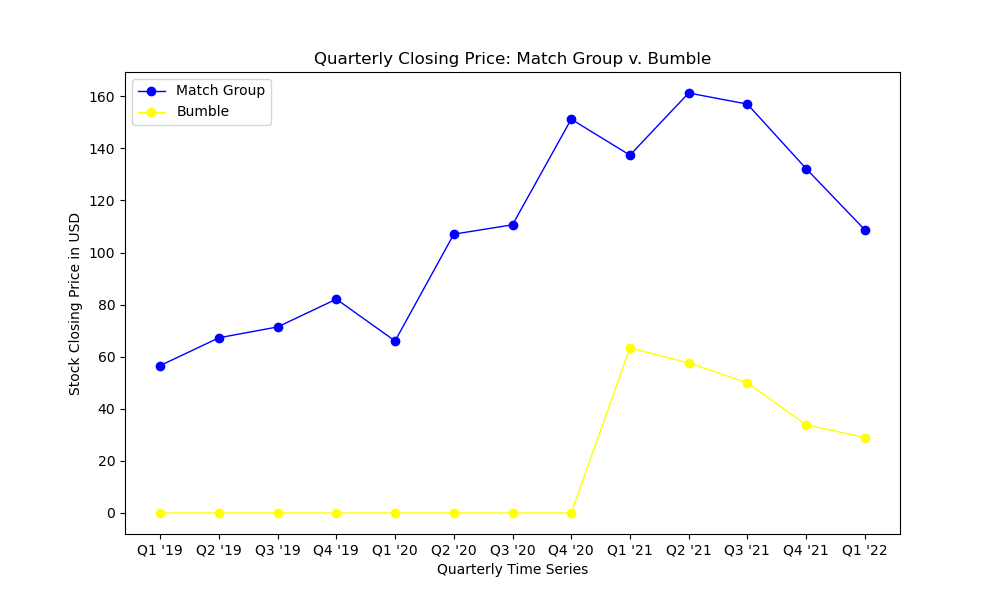

In [67]:
plt.figure(figsize=(10,6))
xpoints = np.array(stocks_df["Quarter"])
ypoints = [56.61, 67.27, 71.44, 82.11, 66.04, 107.05, 110.65, 151.19, 137.38, 161.25, 156.99, 132.25, 108.74]
match = plt.plot(xpoints, ypoints, marker="o",color="blue", linewidth=1, label="Match Group")
bumblepoints = np.array(stocks_df["Bumble Closing Price"])
bumble = plt.plot(xpoints, bumblepoints, marker="o",color="yellow", linewidth=1, label="Bumble")

plt.xlabel("Quarterly Time Series")
plt.ylabel("Stock Closing Price in USD")

plt.legend(loc="best")

plt.title("Quarterly Closing Price: Match Group v. Bumble")
plt.savefig("Images/Stocks.png")

